<a href="https://colab.research.google.com/github/Niranjan-Dharma/AI/blob/master/Haberman's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Haberman's Survival Data Set:**
Data Set Information:
The dataset contains cases from a study 
that was conducted between 1958 and 1970 at 
the University of Chicago's Billings Hospital 
on the survival of patients who had undergone 
surgery for breast cancer.



# Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
 >1 = the patient survived 5 years or longer
 
 >2 = the patient died within 5 year

# Haberman Dataset:

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load haberman.csv into a pandas dataFrame.

haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.head()
#This function returns the first five rows in dataset.


,age,operations_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:

haberman["survival_status"] = haberman["survival_status"].map({1:"yes", 2:"no"})
haberman.head()


,age,operations_year,axillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [5]:
#printing the shape of dataset
print(haberman.shape)

(306, 4)


>Dataset comprises of 306 rows and 4 columns.

In [6]:
#printing the column in dataset.
print(haberman.columns)

Index(['age', 'operations_year', 'axillary_nodes', 'survival_status'], dtype='object')


In [7]:
#printing the Value.Counts
haberman["survival_status"].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

The value_counts() function tells how many data points for each class are present.
>1 Attribute to 225  out of 306 patients were survived more than 5 years \
>2 Attribute to 81 patients died within 5years
>The dataset is imbalanced.

In [8]:
haberman.describe()

,age,operations_year,axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
long_survival= haberman[haberman["survival_status"]== "yes"]
long_survival.describe()

,age,operations_year,axillary_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [10]:
short_survival= haberman[haberman["survival_status"]== "no"]
short_survival.describe()

,age,operations_year,axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


#### **Observations:**
> The nodes of long suvival is less when compared to short survival, due to this the patient having higher nodes are short lived.

> The mean of age and operations year are very similar when compared each other.

In [11]:
print("\nMedian:")
print(np.median(long_survival["axillary_nodes"]))
print(np.median(np.append(long_survival["axillary_nodes"],50)))
print(np.median(short_survival["axillary_nodes"]))

print("\nQuantiles")
print(np.percentile(long_survival["axillary_nodes"],np.arange(0,100,25)))
print(np.percentile(short_survival["axillary_nodes"],np.arange(0,100,25)))

print("\n90th percentile")
print(np.percentile(long_survival["axillary_nodes"],90))
print(np.percentile(short_survival["axillary_nodes"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(long_survival["axillary_nodes"]))
print(robust.mad(short_survival["axillary_nodes"]))


Median:
0.0
0.0
4.0

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Observations:**


> From the above observations Median of long survival chance is 0 that is, the patients with 0 axillary nodes have higher chance of survivability of more than 5 years and patients with median of short survival is 4 i.e people with average of 4 axiallry nodes have less chance of survivabilty.


> Quantiles of long survival with 75th% has an average of 3 nodes or below and with that we can conclude remaining 25% patients are having more than 3 axillary nodes. 

> In short survival 75th% of patients having a minimum of 11 nodes detected.

> And at 90th% if nodes >8 then the patients can be treated as long survival,and if nodes more than 20 then the patients will be treated as short survival.





#  **2-D** **Scatter Plot :**

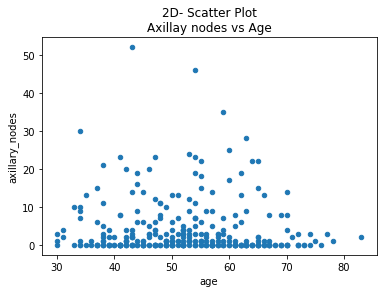

In [12]:
haberman.plot(kind="scatter",x="age",y="axillary_nodes")
plt.title("2D- Scatter Plot""\nAxillay nodes vs Age")
plt.show()

**Observations :**

*  In the above scatter plot, all positions are overlapped, hence due to the same colour we couldn't distinguish between data.
*  In order to distinguish data more accurately with different patterns, we use seaborn library package in the next code snipet.



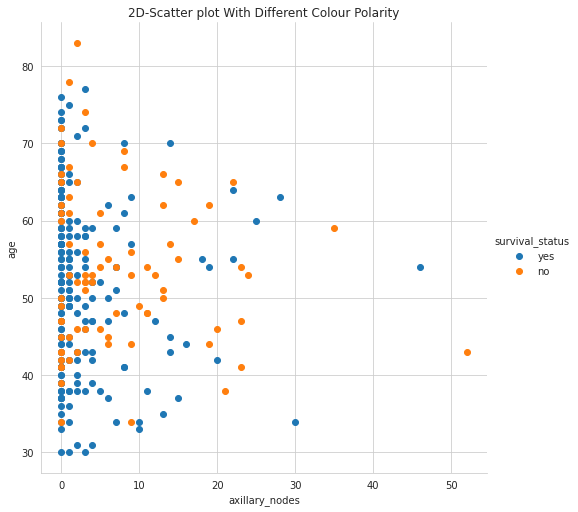

In [13]:
#2D Color Scatter plot using Seaborn library:

sns.set_style("whitegrid");
sns.FacetGrid(data=haberman,hue="survival_status",height=7)\
.map(plt.scatter,"axillary_nodes","age")\
.add_legend();
plt.title("2D-Scatter plot With Different Colour Polarity")
plt.show()

**Observations :**
*   From the above plot we can see that the persons with zero axillary_nodes
are survived irrespective of age.
*  Patients above 50 years of age and axillary nodes above 10 are more likely to die.






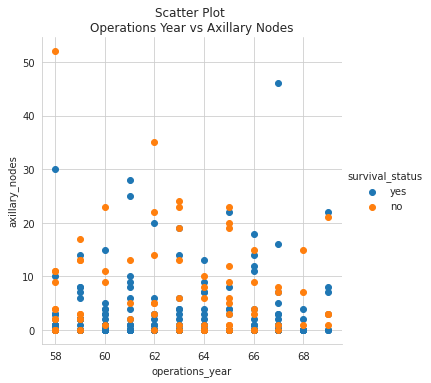

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(data=haberman,hue="survival_status",height=5)\
.map(plt.scatter,"operations_year","axillary_nodes")\
.add_legend();
plt.title("Scatter Plot \nOperations Year vs Axillary Nodes")
plt.show()

**Observations :**
>This graph doesn't give much insight from dataset, but one can see most of the operations done in the year 1965 were unsuccessfull.


## **Multivariate Analysis**

Mulitivariate Analysis examines two or more variables. 
* Using Pair plot in seaborn, plots the scatter plot between every two data columns in a given data frame. It is used to visualize the relationship between two variables.

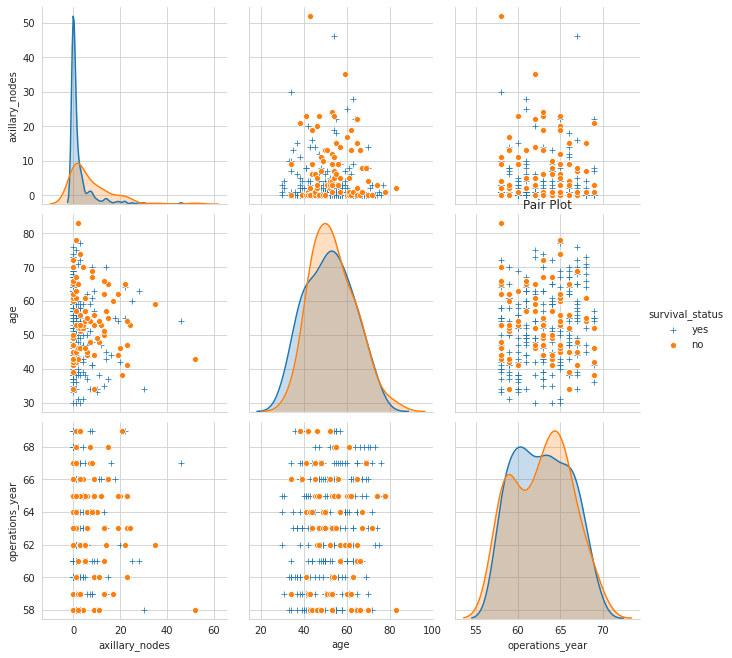

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,hue="survival_status",vars=["axillary_nodes","age","operations_year"],height=3,\
             markers = ["+","o"])
plt.title("Pair Plot")
plt.show()

**Observations:**

* From the above pairplots Plots, plot 1, plot 5 and Plot 9 are the histograms  which explains the density of data by considering different features.
* From plot 2 that is auxilary nodes and age, and  plot 4, where one can observe the scattered data overlapping, however the points on the plots have meaningfull insight in which, plot data can be used to distinguish more precisely than other plots.











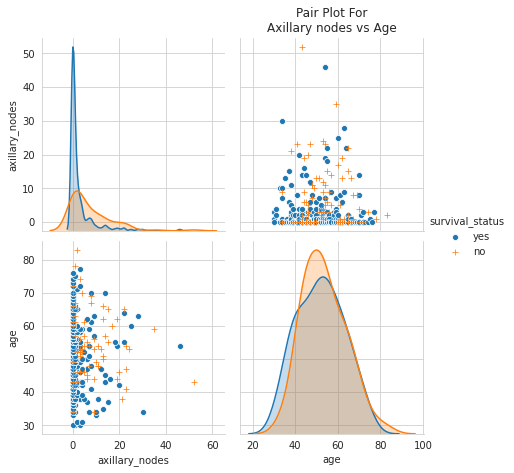

In [16]:
sns.set_style("whitegrid");
sns.pairplot(haberman,hue="survival_status",\
             vars=["axillary_nodes","age",],height=3,markers =["o","+"])
plt.title("Pair Plot For\nAxillary nodes vs Age")
plt.show()

**Observation :**
* Here from the above plot the patients with 0 auxilary nodes are more likely to survive irrespective of age.
*  patients with axillary nodes above 10 and age older than 50 are more likely to die.





## **Univariate Analysis**

The purpose of the uni variate analysis is to distinguish, summarize and find patterns in single variable.



**1D- Scatter plot**



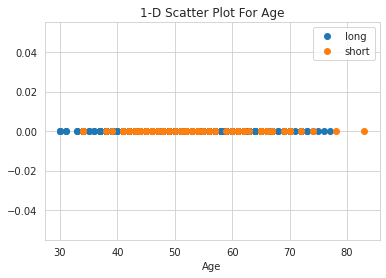

In [17]:
#1D- scatter plot

import numpy as np

long_survival = haberman.loc[haberman["survival_status"] == "yes"]
short_survival = haberman.loc[haberman["survival_status"] == "no"]
plt.plot(long_survival["age"], np.zeros_like(long_survival["age"]), 'o', label = "long")
plt.plot(short_survival["age"], np.zeros_like(short_survival["age"]), 'o', label = "short")
plt.title("1-D Scatter Plot For Age")
plt.xlabel("Age")
plt.legend()
plt.show()



**Observations:**

* From this plot we can easily count number of points that are there in age range who survived or not.
* From Age 40-65, survival rate below 5 years is quite unsuccessfull.



## **PDF**

PDF (Probability Density Function):- It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram

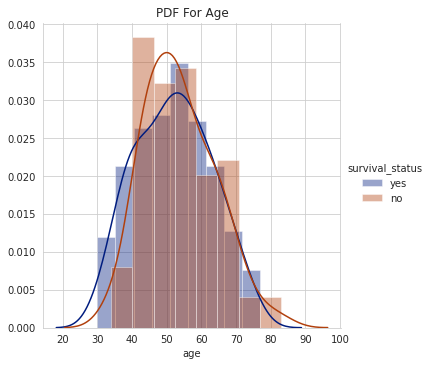

In [18]:
sns.FacetGrid(haberman,height=5,hue="survival_status",palette="dark")\
.map(sns.distplot,"age")\
.add_legend();
plt.title("PDF For Age")
plt.show()

**Observations:**
In the above plot it is observed that at the age range from 30–75, the status of survival and death is same. So, using this datapoint we cannot predict anything

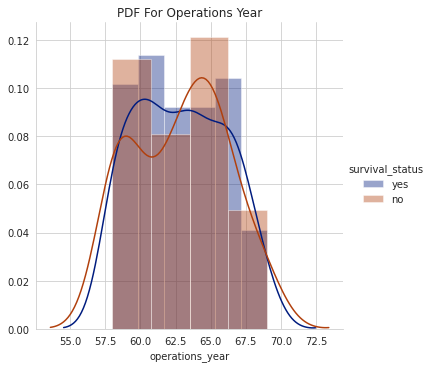

In [19]:
sns.FacetGrid(haberman,height=5,hue="survival_status",palette="dark")\
.map(sns.distplot,"operations_year")\
.add_legend();
plt.title("PDF For Operations Year")
plt.show()

**observations:**

Similar from the above histogram, data is overlapping, as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.

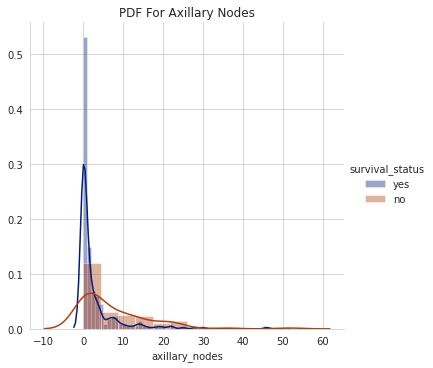

In [20]:
sns.FacetGrid(haberman,hue="survival_status",height=5,palette="dark")\
   .map(sns.distplot,"axillary_nodes")\
   .add_legend();
plt.title("PDF For Axillary Nodes")
plt.show()

**Observation:**

1. We can conclude from the above plot, that the persons with 0 axillary nodes  are more likely  to survive and Auxilary nodes more than 30 are more likely to die.
2. From among all PDF , I accept Axillary nodes data as best reliable and can be used to conclude that :

if(AxillaryNodes≤0)
Patient= Long survival
else if(AxillaryNodes≥0 && Axillary nodes≤3.5(approx))
Patient= Long survival chances are high
else if(Axillary nodes ≥3.5)
Patient = Short survival







## **CDF**

CDF will give the cumulative plot of PDF .

By using CDF we can calculate what are the exact percentage of patient survival status.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 1.0, 'CDF For Long Survival Status')

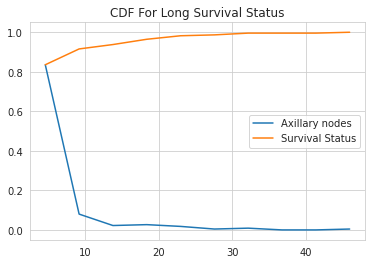

In [21]:
count1 , bin_edges1 = np.histogram(long_survival['axillary_nodes'] , bins = 10 )
pdf1 = count1/sum(count1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:] , pdf1,label="Axillary nodes")
plt.plot(bin_edges1[1:], cdf1,label="Survival Status")
plt.legend()

plt.title("CDF For Long Survival Status")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


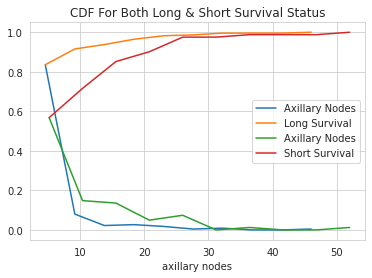

In [22]:
#cdf on axil_node 

count1 , bin_edges1 = np.histogram(long_survival['axillary_nodes'] , bins = 10 )
pdf1 = count1/sum(count1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:] , pdf1,label="Axillary Nodes")
plt.plot(bin_edges1[1:], cdf1,label="Long Survival")
plt
plt.title("CDF For Both Long & Short Survival Status")


count2 ,bin_edges2 = np.histogram(short_survival['axillary_nodes'] , bins=10)
pdf2 = count2/sum(count2)
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:] , pdf2,label="Axillary Nodes")
plt.plot(bin_edges2[1:] , cdf2,label="Short Survival")
plt.xlabel("axillary nodes")
plt.legend()
plt.show()


**Observartions:**

1. From the above CDF, we can observe that, nearly 80 percent of patients have the survival chance if auxilary nodes are below 5.

2. With respect to increase in auxilary nodes the survival chance declined accorrdingly.

3. There are 55 percent of short survival patients who are having nodes less than 5

4. Atlast auxilary nodes detected above 40 have the 100 percent less chance of survival below 5 years.



## **Box Plots**

>Box plot takes a less space and visually represents the five number summary of the data points in a box.
The outliers are displayed as points outside the box.
1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR

Inter Quartile Range = Q3 -Q1

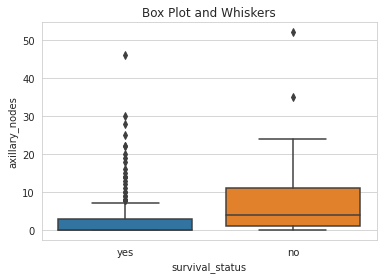

In [23]:
sns.boxplot(x="survival_status",y="axillary_nodes",data=haberman)
plt.title("Box Plot and Whiskers")
plt.show()

**Observation :**

>Box plot shows that the more number of auxilary nodes ones patient have, there will be less chance of survival

>In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2.



## **Violin Plots**

>Violin plot is the combination of box plot and probability density function.

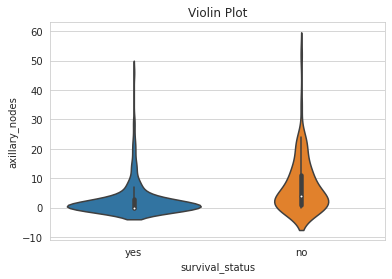

In [24]:
sns.violinplot(x="survival_status",y="axillary_nodes",data = haberman,size= 7)
plt.title("Violin Plot")
plt.show()

**Observations :**

1.After taking a look at violin plot we can observe, for long survival in first case the patient should have zero auxilary nodes and it wiskers in range from 0-7 .


## **Contour Plot**


>A contour line or isoline of a function of two variables is a curve along which the function has a constant value. It is a cross-section of the three-dimensional graph.

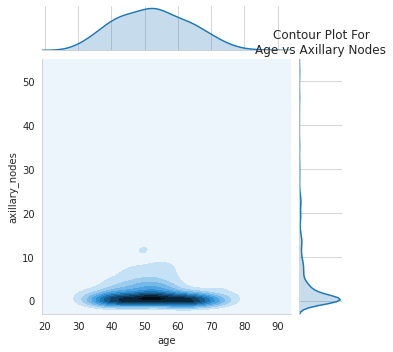

In [25]:
sns.jointplot(x="age",y="axillary_nodes",data =haberman,kind="kde",height=5)
plt.title("Contour Plot For\nAge vs Axillary Nodes")
plt.show()

**Observation**:

 Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. 

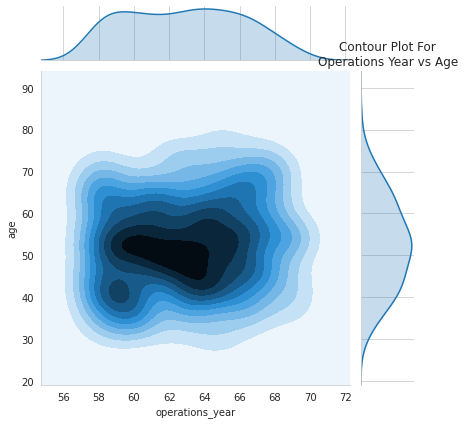

In [26]:
sns.jointplot(x="operations_year",y="age",kind="kde",data= haberman)
plt.title("Contour Plot For\nOperations Year vs Age")
plt.show()

**Observations :**

From 1959 to 1964, more operations are done on the patients in the age group 45 to 55.

## **Conclusion :**


> From dataset, Patients age and Operations year alone are not the deciding factors for survival chance, yet people less than 35 years of age have more chance of survival.



> From above observations survival chance is inversly propertional to axillary nodes, yet the patients with zero axillary nodes have more chance of survival than from the rest.

>Atlast the object of deciding a new patient survival rate is difficult based on the present features, due to imbalanced data. 



